In [2]:
#import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.offline import plot

### **1. 데이터 불러오기**

In [3]:
한달데이터 = pd.read_csv('C:/GitHub/UST_RandomData/갤럭시아머니트리.csv',index_col=0) #인덱스로 사용할 컬럼 설정

### **2. Mean value 계산**
<center>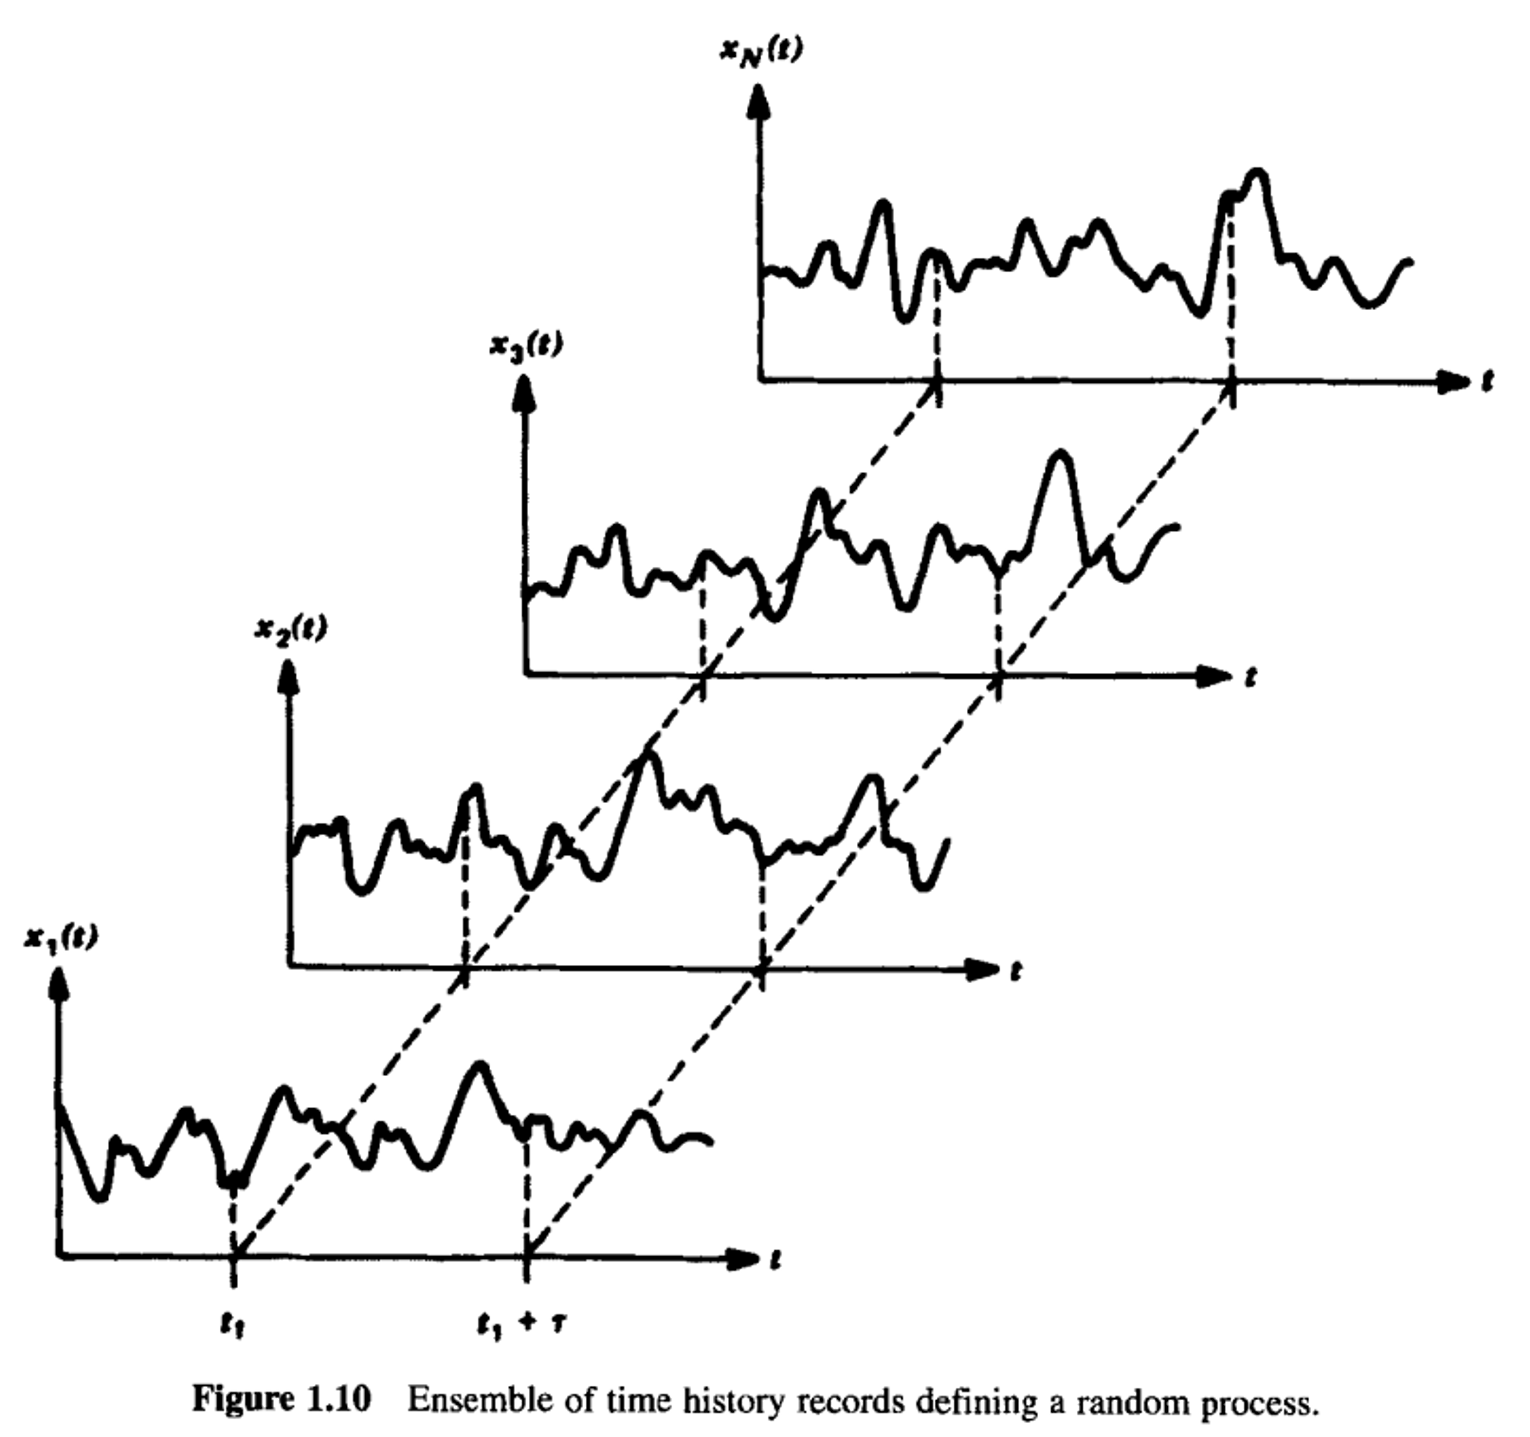</center>
$$\mu_x(t_1)=\lim_{N \to \infty}\frac{1}{N}\displaystyle\sum_{k=1}^N{x_k}(t_1)$$

In [5]:
# 첫번째 데이터 불러오기
# 9시 0분 데이터...
첫데이터들 = 한달데이터[(pd.DatetimeIndex(한달데이터.index).hour == 9) & (pd.DatetimeIndex(한달데이터.index).minute == 0)] 
# 그런데 이런식으로 하면 나머지 데이터들을 불러올 때 너무 힘들 것 같다. 
# 하루 데이터의 수를 카운트 해서 첫번째+데이터 수 이런식으로 불러오는 것이 반복문 처리하기에 좋을 듯 하다.
# 하루 데이터 수는

첫날데이터 = 한달데이터[pd.DatetimeIndex(한달데이터.index).day == 4]  #12월 4일 데이터
둘째데이터 = 한달데이터[pd.DatetimeIndex(한달데이터.index).day == 7]  #11월 7일 데이터
# 한달데이터.index → '2023-11-07 09:00:00+09:00' 와 같은 정보를 출력
# pd.DatetimeIndex(한달데이터.index).day → index 중 day에 해당하는 int 값을 출력
# pd.DatetimeIndex(한달데이터.index).day == 7 → index 중 day 값이 7인 low만 True, 나머지는 False
# 한달데이터[pd.DatetimeIndex(한달데이터.index).day == 7] → index.day 값이 7인 정보만 출력
# 7,8일 357개. 4일 358개. .... 그때 그 때 다르냐...
# 어디가 다른걸까
# 근데 60*6 = 360개가 되어야 하는데 한두개 씩 데이터가 빠진 것 같다..ㅎ

# 첫 데이터들을 살펴보니 19개 밖에 없다. 28개여야 하는데.. 
# 9시 1분 데이터를 보자
둘데이터들 = 한달데이터[(pd.DatetimeIndex(한달데이터.index).hour == 9) & (pd.DatetimeIndex(한달데이터.index).minute == 1)] 

#가 아니고 평일만 치면 20일 인데 16일에 수능 때문에 10시부터 장 시작.. 16일 데이터는 제거하고 가자. 
# 그러면 19일 데이터들의 시작 데이터들의 평균은
첫데이터들.Open.mean() # 6997.368421052632 이 나온다. 




#### **t에 따른 Mean Value 그래프를 그려보자**

In [15]:
# 일단 날짜 인덱스를 저장하자
날짜들 = pd.DatetimeIndex(첫데이터들.index).day

#날짜별로 정제한 데이터 중 1번째 데이터만 수집. 
#시간으로 하면 편하지만, 날짜별로 없는 시간대가 있기 때문에 이 방식으로 진행.
# 우선, 첫번째 데이터들의 평균
저장소 = [] # 날짜별 첫번째 데이터를 담을 리스트 변수 생성
for i in 날짜들: 
    하루데이터 = 한달데이터[pd.DatetimeIndex(한달데이터.index).day == i] # i번째 날의 데이터 받기
    저장소.append(하루데이터.Open[0]) # Open 데이터 중 첫번째 데이터만 담기

저장소 = pd.DataFrame(저장소) # 순서가 뭔가 뒤죽박죽인 느낌이 든다. 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9204\1830379020.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

